<a href="https://colab.research.google.com/github/baitiarecorvalan/MAT281-Entregables/blob/main/docs/codes/projects/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto
Nombres de integrantes:

* Arantza Ormeño

* Aranxa Veloz

* Carlos Flores

* Oscar Alcántara

* Diego Wielandt

* Baitiare Corvalán      

# Definición del Problema de Churn
Nombres de integrantes

En el contexto actual de la industria de las telecomunicaciones, la retención de clientes se ha convertido en un aspecto estratégico de alta prioridad. Dado que los mercados se encuentran altamente saturados y competitivos, las empresas deben invertir considerables recursos no solo en adquirir nuevos usuarios, sino también en mantener a los actuales. Diversos estudios demuestran que conservar a un cliente existente resulta entre cinco y siete veces más económico que captar uno nuevo. Sin embargo, comprender las razones por las cuales los clientes deciden abandonar un servicio —fenómeno conocido como churn— sigue siendo un desafío complejo que combina factores económicos, contractuales, técnicos y de satisfacción del usuario.

El problema del churn consiste en predecir qué clientes tienen mayor probabilidad de cancelar su servicio dentro de un período determinado. Esta predicción permite a las empresas actuar de manera preventiva, diseñando estrategias personalizadas de fidelización, descuentos, mejoras en la atención al cliente o planes adaptados a las necesidades detectadas. En la práctica, esto se traduce en una ventaja competitiva significativa, al reducir las pérdidas de ingresos y aumentar la estabilidad de la base de clientes.

El propósito de este proyecto es desarrollar un modelo de Machine Learning supervisado capaz de identificar patrones y factores asociados al abandono de clientes en una empresa de telecomunicaciones. Para ello, se trabajará con un conjunto de datos que contiene información demográfica (edad, género, tipo de contrato, métodos de pago, etc.) y de comportamiento (uso de servicios, duración del contrato, facturación mensual, reclamos, entre otros). A partir de esta información, se buscará descubrir relaciones relevantes entre las variables independientes y la variable dependiente Churn.

La variable objetivo (Churn) se define como una variable binaria que indica el estado del cliente respecto a la empresa:

* Churn = Yes: el cliente ha abandonado o cancelado su contrato.

* Churn = No: el cliente permanece activo en la empresa.

El objetivo analítico es doble:

* Predictivo: construir un modelo que anticipe con alta precisión la probabilidad de abandono de un cliente.

* Descriptivo e interpretativo: analizar los principales factores que influyen en la decisión de cancelar el servicio, con el fin de aportar información útil para el diseño de políticas comerciales y estrategias de retención.

Finalmente, este análisis permitirá transformar datos históricos en conocimiento accionable, entregando conclusiones claras para la toma de decisiones empresariales. Además, el proyecto busca resaltar la importancia del data-driven decision making dentro del ámbito corporativo, evidenciando cómo el uso de modelos predictivos puede optimizar la gestión de clientes y mejorar la eficiencia de las operaciones de marketing y servicio al cliente.

A continuación, se entrega un listado de las columnas de la data con su descripción para ayudar a una mayor comprensión

* `customerID`: ID de un cliente
* `gender`: Género del cliente
* `SeniorCitizen`: Si el cliente es de edad madura (1,0)
* `Partner`: Si el cliente tiene pareja o no (Yes, No)
* `Dependents`: Si el cliente tiene dependientes (Yes, No)
* `tenure`: Número de meses que un cliente se ha mantenido con una compañía
* `PhoneService`: Si el cliente tiene servicio telefónico o no (Yes, No)
* `MultipleLines`: Si el cliente tiene múltiples líneas o no (Yes, No, No phone service)
* `InternetService`: Si el cliente tiene servicio de internet (DSL, Fiber optic, No)
* `OnlineSecurity`: Si el cliente tiene seguridad online o no (Yes, No, No internet service)
* `OnlineBackup`: Si el cliente tiene respaldo o no (Yes, No, No internet service)
* `DeviceProtection`: Si el cliente tiene protección de su dispositivo o no (Yes, No, NO internet service)
* `TechSupport`: Si el cliente tiene soporte técnico o no (Yes, No, No internet service)
* `StreamingTV`: Si el cliente tiene transmisión de TV o no (Yes, No, No internet service)
* `StreamingMovies`: Si el cliente tiene transmisión de películas o no (Yes, No, No internet service)
* `Contract`: El término del contrato (Month-to-month, One year, Two year)
* `PaperlessBilling`: Si el cliente tiene facturación electrónica o no (Yes, No)
* `PaymentMethod`: El método de pago del cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* `MonthlyCharges`: El cargo mensual de un cliente
* `TotalCharges`: El cargo total de un cliente
* `Churn`: Si el cliente terminó el contrato (Yes, No)

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/arantzaOR/mat281-entregables/refs/heads/main/docs/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Análisis exploratorio

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df.shape, df.head()

((7043, 21),
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV Streamin

### Exploración inicial del dataset

In [ ]:
df.info()
df.isna().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


np.int64(0)


El conjunto de datos cuenta con 7043 observaciones y 21 variables, sin valores nulos ni duplicados.  
Las variables incluyen tanto información demográfica como detalles de servicios y facturación.  
Esto confirma que el dataset está limpio y listo para empezar con el análisis exploratorio.


In [ ]:
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].astype(str).str.strip()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.loc[df['tenure'].eq(0) & df['TotalCharges'].isna(), 'TotalCharges'] = 0
df.loc[df['TotalCharges'].isna(), 'TotalCharges'] = df['MonthlyCharges'] * df['tenure']

num_cols = df.select_dtypes(include=np.number).columns
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


Se realiza una limpieza de los datos, eliminando espacios en variables categóricas y corrigiendo el tipo de dato en `TotalCharges`.  
Además, se completan valores faltantes de forma coherente con las demás variables.  
Finalmente, se muestran estadísticas descriptivas de las columnas numéricas principales, lo que permite observar la dispersión de cargos y duración del servicio.

La tabla anterior muestra las estadísticas descriptivas de las variables numéricas del conjunto de datos.  
Se observa que la mayoría de los clientes no son adultos mayores (`SeniorCitizen` ≈ 0.16),  
el tiempo promedio de permanencia (`tenure`) es de alrededor de 32 meses,  
y los cargos mensuales (`MonthlyCharges`) promedian 64.76 unidades monetarias.  
Por otro lado, los cargos totales (`TotalCharges`) presentan una alta dispersión, con valores que alcanzan hasta 8684.8,  
lo que refleja la diversidad en la duración de los contratos y tipos de servicio de los clientes.

A continuación, se analizarán las distribuciones y correlaciones de las variables principales, con el objetivo de identificar patrones generales en el comportamiento de los clientes.

### Distribución de variables numéricas

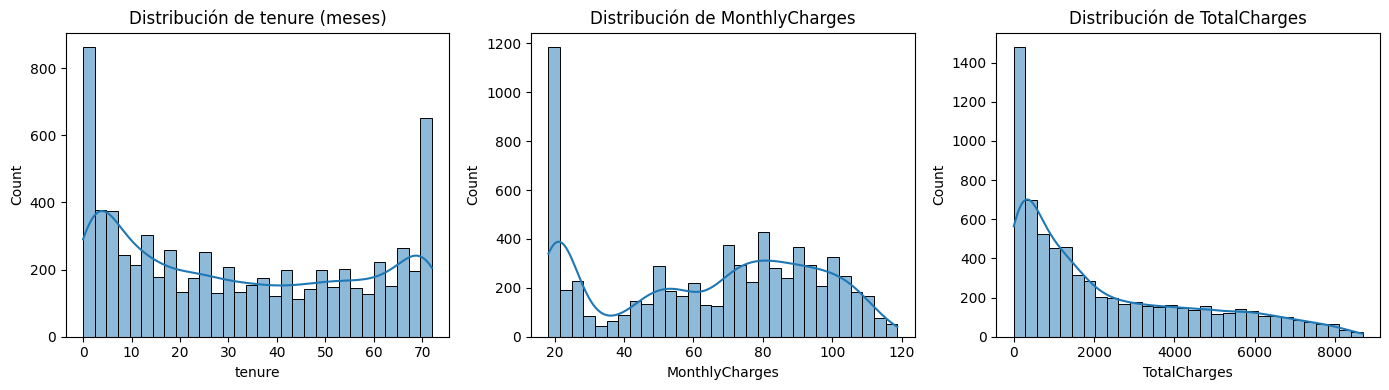

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(14, 4))
sns.histplot(df['tenure'], bins=30, kde=True, ax=ax[0]); ax[0].set_title('Distribución de tenure (meses)')
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, ax=ax[1]); ax[1].set_title('Distribución de MonthlyCharges')
sns.histplot(df['TotalCharges'], bins=30, kde=True, ax=ax[2]); ax[2].set_title('Distribución de TotalCharges')
plt.tight_layout(); plt.show()


Los histogramas muestran que la mayoría de los clientes son nuevos (tenure con valores bajos), mientras que un grupo menor tiene permanencias altas.
En MonthlyCharges, la distribución refleja distintos tipos de planes y niveles de pago, concentrados entre 20 y 100 USD.
Por último, TotalCharges presenta una fuerte asimetría positiva, ya que la mayoría acumula cargos bajos, coherente con clientes recientes.

En conjunto, las variables numéricas indican una base de usuarios diversa, con muchos clientes nuevos y distintos niveles de gasto.

### Distribución de la variable objetivo


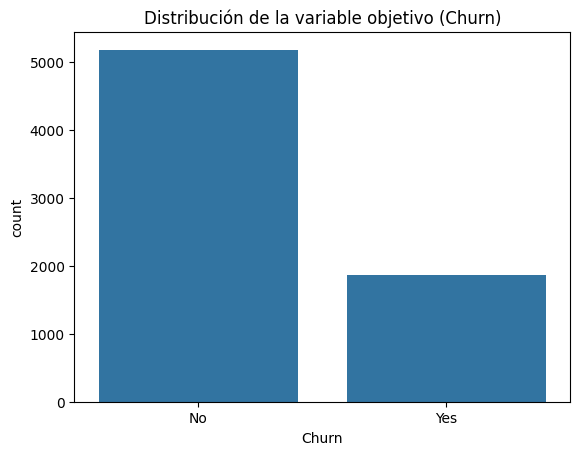

,proportion
Churn,
No,73.46
Yes,26.54


In [ ]:
sns.countplot(data=df, x='Churn')
plt.title('Distribución de la variable objetivo (Churn)')
plt.show()

(df['Churn'].value_counts(normalize=True)*100).round(2)


La variable Churn presenta un claro desbalance: el 73,5 % de los clientes permanece en la empresa (No) y el 26,5 % ha cancelado su servicio (Yes).
Esto indica que la mayoría de los usuarios se mantienen activos, aunque una cuarta parte representa riesgo de pérdida, algo importante a considerar en el modelado y las estrategias de retención.

A continuación, se calcula la matriz de correlación para cuantificar la relación lineal entre las variables numéricas y la variable objetivo (Churn).

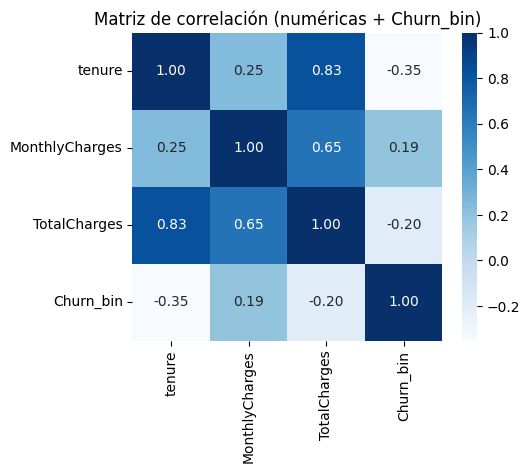

In [ ]:
corr = df[['tenure','MonthlyCharges','TotalCharges']].assign(Churn_bin=df['Churn'].map({'No':0,'Yes':1})).corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title('Matriz de correlación (numéricas + Churn_bin)')
plt.show()


La matriz de correlación muestra una fuerte relación positiva entre tenure y TotalCharges (0.83), lo que confirma que los clientes con mayor permanencia acumulan más cargos totales.
MonthlyCharges también se correlaciona moderadamente con ambas variables, ya que los pagos mensuales más altos influyen en los montos totales.
Por otro lado, la variable Churn_bin presenta una correlación negativa con tenure (-0.35), indicando que los clientes con menos tiempo en la empresa son más propensos a abandonar el servicio.

En conjunto, estas correlaciones refuerzan los patrones observados en los gráficos anteriores: el tiempo de permanencia y el costo del servicio son factores clave asociados al churn.

### Conclusión Análisis exploratorio


En esta sección se realizó una exploración completa del conjunto de datos, abarcando tanto el análisis estadístico como la visualización de las variables numéricas y de la variable objetivo.

Los histogramas permitieron identificar que la mayoría de los clientes son relativamente nuevos, con valores bajos en tenure, y que existe una gran variabilidad en los cargos mensuales (MonthlyCharges) y totales (TotalCharges). Asimismo, se observó que la variable objetivo (Churn) presenta un claro desbalance, con aproximadamente un 73 % de clientes activos y un 27 % que han abandonado el servicio.

Por otro lado, la matriz de correlación evidenció una relación positiva entre tenure y TotalCharges, coherente con el hecho de que una mayor permanencia implica mayores cargos acumulados, además de una correlación negativa entre tenure y Churn, lo que sugiere que los clientes con menor tiempo en la empresa son más propensos a abandonar el servicio.

En conjunto, estos resultados entregan una primera comprensión global del comportamiento de los clientes y de los factores asociados al abandono, estableciendo una base sólida para la siguiente etapa de visualización descriptiva, donde se profundizará en la comparación entre los clientes que permanecen y los que abandonan el servicio.

# Visualización Descriptiva

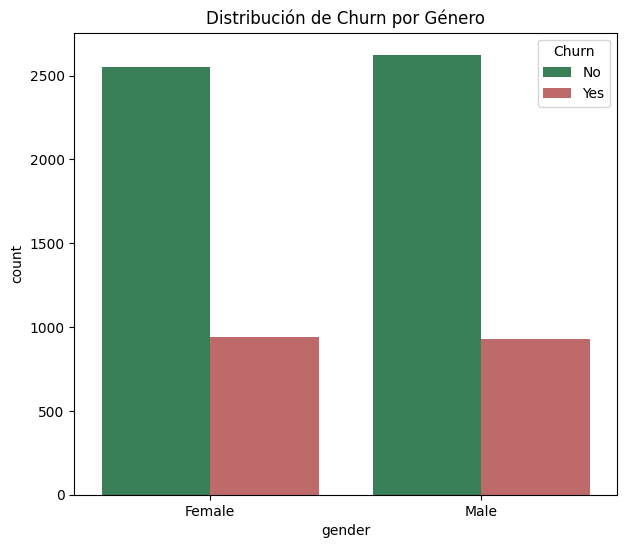

In [ ]:
# Por lo general, se escoge el color verde para la entrada 'No'
# puesto que esto significa que el cliente continua con el contrato con la empresa
# que es lo buscado
plt.figure(figsize=(7, 6))
sns.countplot(data=df, x='gender', hue='Churn', palette=['#2E8B57', '#CD5C5C'])
plt.title('Distribución de Churn por Género')
plt.show()

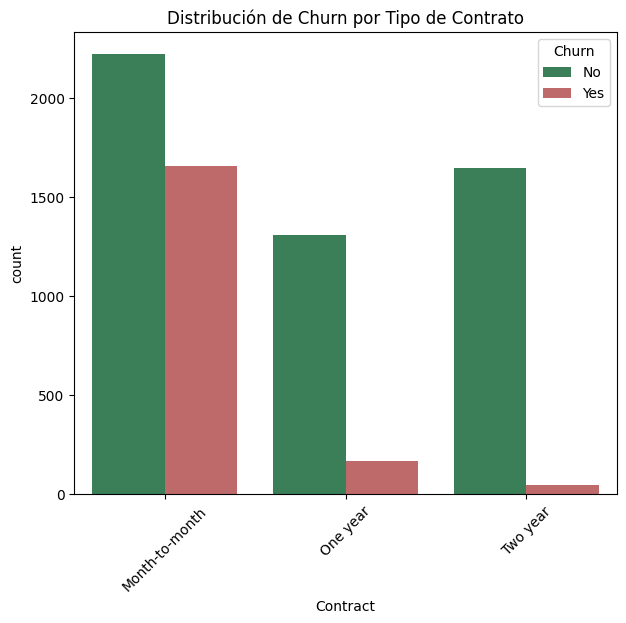

In [ ]:
plt.figure(figsize=(7, 6))
sns.countplot(data=df, x='Contract', hue='Churn', palette=['#2E8B57', '#CD5C5C'])
plt.title('Distribución de Churn por Tipo de Contrato')
plt.xticks(rotation=45)
plt.show()

En estos graficos podemos ver una comparación por demografía, el primero nos muestra que no hay una gran diferencia entre el género de la persona con el contrato, por lo que es una variable que podemos no tomar en cuenta.

El segundo gráfico nos muestra que los contratos que tienen menor cantidad de abandonos o cancelaciones del contrato son los que duran dos años, mientras que los mensuales, a pesar de ser los más contratados, también son los más abandonados.

/tmp/ipython-input-651657609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Churn', y='MonthlyCharges', palette=['#2E8B57', '#CD5C5C'])


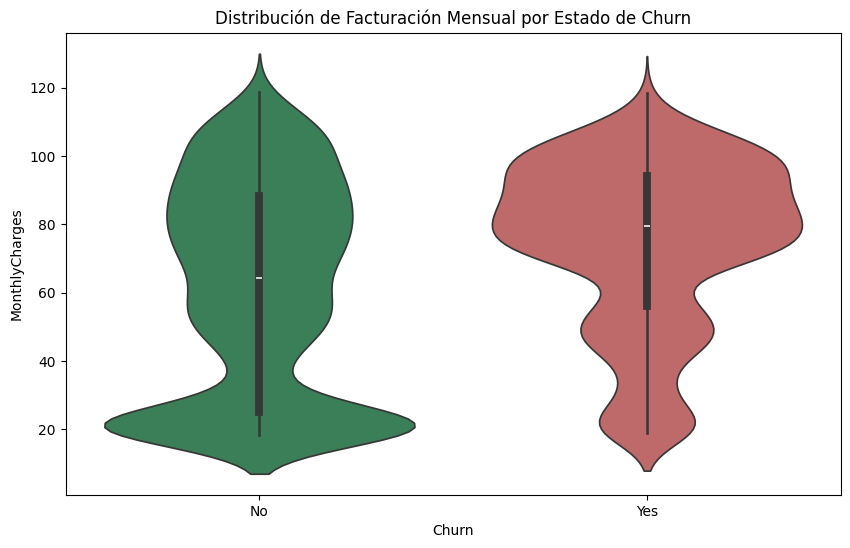

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Churn', y='MonthlyCharges', palette=['#2E8B57', '#CD5C5C'])
plt.title('Distribución de Facturación Mensual por Estado de Churn')
plt.show()

En el gráfico de violín se ve que la facturación mensual media de los contratos vigentes es mucho menor a la de los contratos abandonados (casi `$` 20 usd menos), a su vez, los contratos vigentes cuentan con un cobro mensual mucho menor (aproximandamente unos `$` 20 usd) mientras que el cargo mensual de los contratos abandonados ronda en su mayoría entre los `$`80 y los `$`100


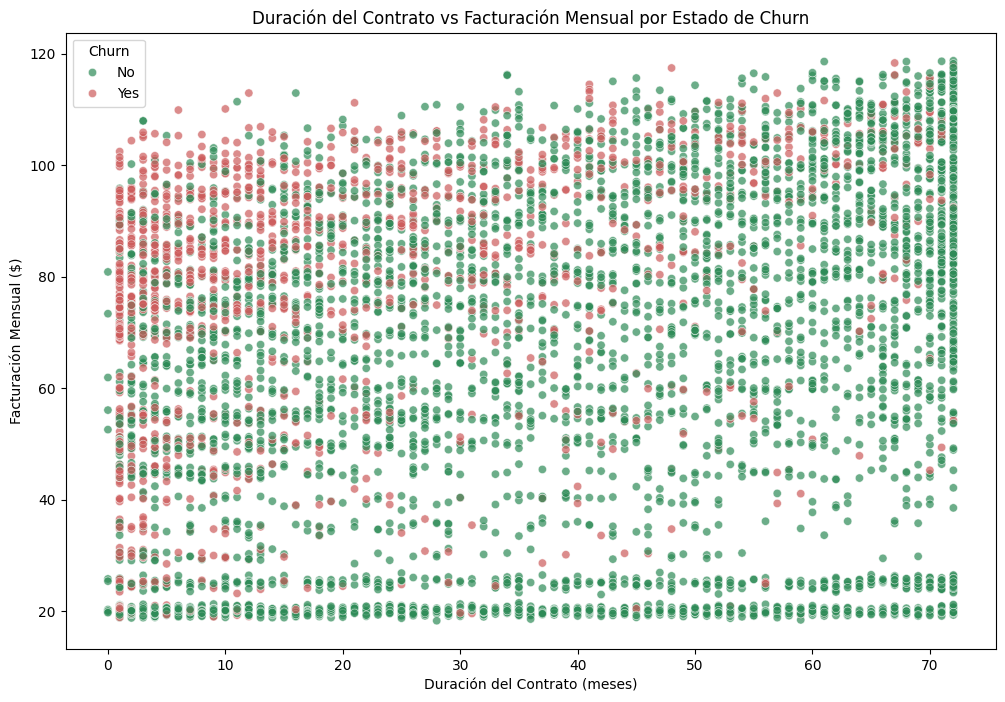

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn',
                palette=['#2E8B57', '#CD5C5C'], alpha=0.7)
plt.title('Duración del Contrato vs Facturación Mensual por Estado de Churn')
plt.xlabel('Duración del Contrato (meses)')
plt.ylabel('Facturación Mensual ($)')
plt.legend(title='Churn')
plt.show()

Aquí se puede apreciar que a medida que el cliente mantiene el contrato por más tiempo, menor cantidad de clientes abandonan a este, sin embargo, también es de notarse que a medida que aumenta la facturación mensual, la cantidad de clientes que abandonan aumentan, es decir, un cliente que lleva poco tiempo con una empresa y que además la facturación mensual es mayor a unos `$`60 usd aproximadamente, es más probable que un cliente que lleva poco tiempo y tenga una facturación mensual de `$`20 usd

/tmp/ipython-input-1326409807.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, ax=axes[i], palette=['#2E8B57', '#CD5C5C'])
/tmp/ipython-input-1326409807.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y=var, ax=axes[i], palette=['#2E8B57', '#CD5C5C'])


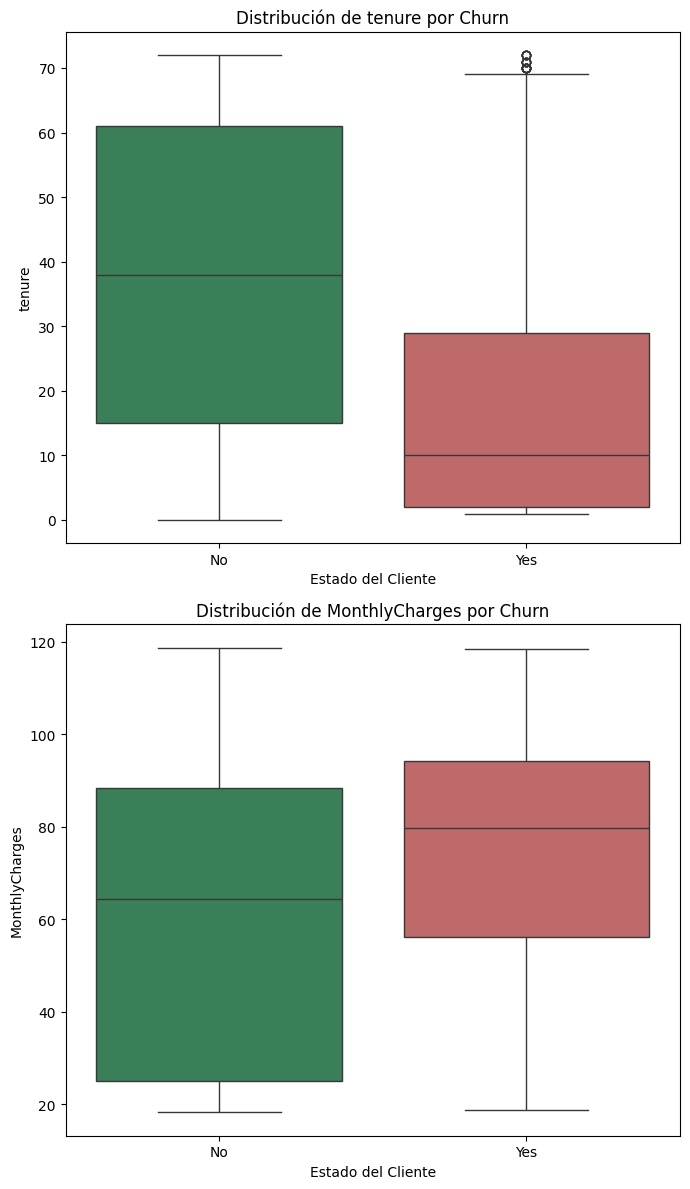

In [ ]:
variables_comportamiento = ['tenure', 'MonthlyCharges']

fig, axes = plt.subplots(2, figsize=(7, 12))
axes = axes.ravel()

for i, var in enumerate(variables_comportamiento):
    sns.boxplot(data=df, x='Churn', y=var, ax=axes[i], palette=['#2E8B57', '#CD5C5C'])
    axes[i].set_title(f'Distribución de {var} por Churn')
    axes[i].set_xlabel('Estado del Cliente')

plt.tight_layout()
plt.show()

De esta sección se puede recopilar bastante información, así que analicemos detenidamente cada gráfica

`ternure`

Esta es un dato que nos entrega la cantidad de meses que un cliente está en una compañía, para los clientes que cuentan con el contrato vigente es notorio que la cantidad de meses es muy superior a los clientes que decidieron dar por terminado el contrato, siendo en el primer caso que la mayoría de clientes cuentan con cais 20 meses hasta unos 60 meses de continuidad con una media cercana a 40 meses (un poco más de 3 años), mientras que los clientes que decidieron declinar el contrato cuentan con que aunque la mayoría no pasa los 30 meses su media es cerca de 10 meses, lo que significa menos de un año con este contrato.

De esto se puede extraer que a medida que más tiempo se pase con el contrato activo, es menos probable que el cliente decida terminar con el servicio.

`MonthlyCharges`

Aquí hay un factor muy importante, el económico, en donde se puede ver que el cargo mensual del servicio varía mucho en los clientes que mantienen sus contratos, teniendo un mínimo cercano a `$20` USD y un máximo cercano a `$90`USD, sin embargo los clientes que decidieron terminar con sus contratos tienden a tener un cargo mensual mucho mayor, aunque tienen un máximo similar, el mínimo es aproximadamente de `$60` USD, siendo un gran cambio de presupuesto para el cliente



# 4.Preprocesamiento


Primero vamos a asegurarnos de que no tengamos valores nulos en nuestra variable objetivo Churn, eliminaremos todas las filas que tengan valores nulos en Churn para así despues solo tener datos con etiquetas claras de si el cliente cancelo (1) o no (0) su servicio.

Luego, para las columnas numericas, evaluaremos que sean del tipo adecuado y se manejan los nulos dentro de cada columna (con pipeline).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

raw=df['Churn'].astype(str).str.strip().str.lower()

def to_bin(v):
    s = str(v).strip().str.lower() if hasattr(v, "strip") else str(v).lower()
    if s in {'yes','y','si','sí','true','t','1'}:
        return 1
    if s in {'no','n','false','f','0'}:
        return 0
    return np.nan

df['Churn'] = raw.apply(lambda s: 1 if s in {'yes','y','si','sí','true','t','1'} else (0 if s in {'no','n','false','f','0'} else np.nan))
df = df.dropna(subset=['Churn']).copy()
df['Churn'] = df['Churn'].astype('int8')

In [ ]:
x=df.drop(['customerID', 'Churn'], axis=1)
y=df['Churn']

num_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
for c in num_col:
    x[c] = pd.to_numeric(x[c], errors='coerce')

cat_col = [col for col in x.columns if col not in num_col]

In [ ]:
#en caso de suavizar los outliers de tenure
Q1_tenure= df['tenure'].quantile(0.25) #calculamos el primer cuartil
Q3_tenure= df['tenure'].quantile(0.75)#y el tercero, para hacer un rango
IQR_tenure=Q3_tenure-Q1_tenure
lower_bound_tenure=Q1_tenure - 1.5 * IQR_tenure
upper_bound_tenure= Q3_tenure + 1.5 * IQR_tenure
df_filtered_tenure=df[(df['tenure'] >= lower_bound_tenure) & (df['tenure'] <= upper_bound_tenure)]
#Cambiamos las variables por aquellas que no tengan los outliers
x = df_filtered_tenure.drop(['customerID', 'Churn'], axis=1)#eliminamos customerID ya que no aporta a la prediccion y Churn que es la variable que buscamos predecir.
y = df_filtered_tenure['Churn']

Utilizamos OneHot para pasar las columnas a datos numericos y aplicarlo luego en el pipeline para los modelos. Se usa un TRY ya que el método que usamos intenta crear un OneHotEncoder usando el parámetro moderno sparse_output=False. Que fallaba de vez en cuando, asi que si falla, mejor pasa a la alternativa
alternativa sparse=False

In [ ]:
try: #para mayor seguridad, ya que nos fallaba a veces
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

### Utilizar Pipeline

Ahora, para los datos numericos, escalaremos utilizando el StandardScaler. Esto asegura que todas las características numéricas tengan la misma escala y en caso de faltar un dato se rellenara con la media. Mientras que para el tratamiento de las columnas categóricas, primero, vamos a rellenar los valores faltantes con el valor más frecuente de cada columna y luego, codificaremos usando One-Hot Encoding, haciendo que cada categoría se vuelva una columna separada con valores binarios (dado que en algunos casos se tiene mas de dos datos categoricos por columna conviene usar nuevas columnas)

Finalmente aplicamos todo el preprocesamiento a las columnas numéricas y categóricas a través de ColumnTransformer. De esta forma, los datos numericos se estandarizan y las variables categóricas se codifican.

In [ ]:
#from sklearn.preprocessing import RobustScaler

num_transformer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), #rellenar los nulos con la media
    ('scaler', StandardScaler()) #standariza los datos
    #('scaler', RobustScaler()) SOLO EN CASO QUE LOS OUTLIERS SEAN MUY INVASIVOS
])

cat_transformer= Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), #rellena los nulos con el dato que mas se repite
    ('encoder', ohe) #evita errores si en inferencia aparece una categoria no vista en el entrenamiento
])

preprocessor= ColumnTransformer(transformers=[
    ('num', num_transformer, num_col), #aplica el prepocesamiento a las columnas numericas
    ('cat', cat_transformer, cat_col) #aplica el preprocesamiento a las columnas categoricas
])


Primero presentamos las funciones para cada modelo usando pipeline (para el correcto uso del preprocesamiento y tecnica SMOTE)

Luego se hace una división de los datos en conjuntos de entrenamiento y prueba con train_test_split que permite usar estratificación, lo que asegura que las proporciones de las clases se mantengan iguales entre los conjuntos de entrenamiento y prueba ya que en nuestro caso, la variable "y" presenta un desbalanceo como se pudo ver en el analisis exploratorio (más clientes que no cancelan que los que si).

Además en las funciones para la aplicacion de cada modelo, SMOTE se encarga del desbalanceo tambien, pero generando muestras sintéticas de la clase minoritaria y así ayuda a que el modelo no se sesgue hacia la clase mayoritaria.

In [ ]:
#Idea repetitiva: creamos el pipeline y utilizamos las funciones de prepocesamiento, SMOTE si es necesario y entrenar un modelo puntual


     #LogisticRegression
pipe_lr= ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),# con random_state=42 nos aseguramos que el proceso que tiene elementos aleatorios produzca siempre los mismos resultados (ejemplos sinteticos)
    ('clf', LogisticRegression(max_iter=1000)) #clf es el nombre del paso que se le dara a gridsearCV para ajustar hiperparamentros
])

            #RANDOM FOREST
#no es necesario utilizar SMOTE ya que este modelo no es sensible a los desbalanceos ya que es mucho mejor usando pesos que oversampling.

pipe_rf = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))# Hacemos que la clase minoritaria tenga un peso menor
])

              #SVM
pipe_svm= ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)), #le sirve utulizar SMOTE
    ('clf', SVC(kernel='rbf', class_weight='balanced'))
])


              #KNN
pipe_knn=ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote',SMOTE(random_state=42)), #le sirve utulizar SMOTE
    ('clf', KNeighborsClassifier(n_neighbors=5))# asi podemos buscar sus 5 vecinos más cercanos en el espacio de dato
])


x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

# Hiperparametros

En esta sección realizamos la búsqueda de hiperparámetros, el entrenamiento y la evaluación comparativa de los modelos utilizados para predecir churn.
Se usara GridSearchCV con validación cruzada (cv=3), utilizando F1-score como métrica principal debido al desbalance de clases (Accuracy puede ser engañoso). Y cada modelo ajusta sus parámetros más relevantes:
  +Regresión Logística el parámetro de regularización C
  +Random Forest se ajustara el número de árboles, profundidad máxima y criterio de división
  +SVM aquellos valores de C y γ del kernel RBF.


Se prepara el terreno para que el GridSearch: En esta etapa se definen los espacios de búsqueda de hiperparámetros para cada modelo (param_lr, param_rf, param_svm). Estos diccionarios especifican las combinaciones de parámetros que rebisará GridSearchCV en la siguiente celda, permitiendo seleccionar automáticamente la configuración óptima de cada clasificador en función del F1-score. En Regresión Logística ajustamos C entre 0.01 y 10, porque este rango permite movernos desde una regularización fuerte hasta una más débil, en Random Forest ajustamos la complejidad de los árboles (100, 200 y 300), la profundidad (None, 10, 20 y 30) y el minimo de divisiones por nodo (2, 5 y 10)y en SVM ajustamos C y gamma entre 0.1 y 10 y los metodos automáticos de gamma (‘scale’ y ‘auto’) para mas libertad de decision y que se suavice mas la curva.


In [ ]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Hacemos los diccionarios de hiperparámetros.
# C se encarga de controlar la fuerza de regularizacion
param_lr = {                        #para usar en logistic regresion
    'clf__C': [0.01, 0.1, 1, 10],   #utilizamos varios valores para encontrar el mejor balance entre mucha regulacion y un poco mas
    'clf__penalty': ['l2']
}

param_rf = { #Para usar en Random Forest
    'clf__n_estimators': [100, 200, 300], #definimos el numero de árboles en el bosque
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10]
}


param_svm = { #para SVM
    'clf__C': [0.1, 1, 10],
    'clf__gamma': ['scale', 'auto'] #lo dejamos automatico para darle mas libertad
}


Luego, ejecutamos el GridSearchCV para los modelos de regresion logistica, Random Forest y SVM, buscando la combinación óptima de hiperparámetros mediante validación cruzada y F1-score (debido al desbalance de clases presente en churn, ya que Accuracy deja de ser confiable). El mejor modelo encontrado en cada búsqueda se almacena mediante best_estimator_, asegurando que la comparación final entre modelos se realice usando su configuración más efectiva. KNN se incluye como baseline sin tuning para contrastar su desempeño frente a modelos optimizados.”

In [ ]:
#Realizacion del gridSearchCV


grids = {
    "Logistic Regression": GridSearchCV(pipe_lr, param_lr, scoring='f1', cv=3, n_jobs=-1), #Se define que el mejor modelo será el que obtenga mayor F1-score
    "Random Forest": GridSearchCV(pipe_rf, param_rf, scoring='f1', cv=3, n_jobs=-1),
    "SVM": GridSearchCV(pipe_svm, param_svm, scoring='f1', cv=3, n_jobs=-1),
}

models_fitted={} #La idea es guardar la mejor combinacion de hiperparamentros para cada modelo

for name, grid in grids.items(): #Recorre cada modelo de acuerdo a su nombre y su respectivo GridSearchCV
    grid.fit(x_train, y_train)   #probamos todas las combinaciones de hiperparámetros
    models_fitted[name]=grid.best_estimator_ #Guarda en models_fitted solo el mejor modelo ya entrenado

# Agregar KNN sin tuning
pipe_knn.fit(x_train,y_train) #entrenamos KNN pero sin GridSearchCV
models_fitted["KNN"]=pipe_knn #Y se añade el modelo al diccionario

Luego, pasamos a hacer la evaluación de cada modelo con sus mejores hiperparametros y así guardar los resultados de sus metricas.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay

def evaluar_modelo(model, x_test, y_test): #Hicimos una función que pueda evaluar todos los modelos y luego unir los resultados en metrics
    y_pred = model.predict(x_test)#Generamos las predicciones finales

#Ya que ROC-AUC no se puede calcular con valores 0,1 evaluamos
    if hasattr(model, "predict_proba"): #entones si el modelo tiene un método llamado predict_proba (regresión logística, Random Forest, KNN, SVM)
        y_score= model.predict_proba(x_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score= model.decision_function(x_test) #esta opcion se usa en SVM ya NO se activo probability=True
    else:
        y_score= None

    metrics = { #definimos las metricas que revisaremos
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_score) if y_score is not None else None
    }
    return metrics

resultados = {} #Para poder en un futuro mostrar los resultados de las metricas de cada modelo

for name, model in models_fitted.items(): #evaluamos cada modelo en la funcion
    print(f"\n Resultados para {name}")
    res= evaluar_modelo(model, x_test, y_test)
    resultados[name] = res
    print(res)
pd.DataFrame(resultados).T.sort_values("F1-score", ascending=False) #mostramos los resultados de acuerdo al mejor F1-Score


 Resultados para Logistic Regression
{'Accuracy': 0.7501419647927314, 'Precision': 0.5187239944521498, 'Recall': 0.8008565310492506, 'F1-score': 0.6296296296296297, 'ROC-AUC': np.float64(0.8435324955568279)}

 Resultados para Random Forest
{'Accuracy': 0.7722884724588303, 'Precision': 0.5530546623794212, 'Recall': 0.7366167023554604, 'F1-score': 0.6317722681359045, 'ROC-AUC': np.float64(0.8435002267093388)}

 Resultados para SVM
{'Accuracy': 0.7739920499716071, 'Precision': 0.5555555555555556, 'Recall': 0.7387580299785867, 'F1-score': 0.6341911764705882, 'ROC-AUC': np.float64(0.8255330979086477)}

 Resultados para KNN
{'Accuracy': 0.6978989210675752, 'Precision': 0.4570673712021136, 'Recall': 0.7408993576017131, 'F1-score': 0.565359477124183, 'ROC-AUC': np.float64(0.7738979774879281)}


,Accuracy,Precision,Recall,F1-score,ROC-AUC
SVM,0.773992,0.555556,0.738758,0.634191,0.825533
Random Forest,0.772288,0.553055,0.736617,0.631772,0.843500
Logistic Regression,0.750142,0.518724,0.800857,0.629630,0.843532
KNN,0.697899,0.457067,0.740899,0.565359,0.773898


Los cuatro modelos evaluados muestran rendimientos razonables, pero con diferencias importantes en como equilibran precisión y recall para la clase minoritaria (clientes que se van). El SVM obtiene el mejor F1-score (0.634), lo que indica el mejor equilibrio entre recall y evitar falsos positivos.

Muy cerca se encuentra el Random Forest, con un F1-score prácticamente igual (0.631), además tiene un alto ROC-AUC (0.8435). Lueo, la regresión logística entrega el mayor recall (0.8009) y su F1-score es algo menor (0.629).

Finalmente, KNN se posiciona como el peor modelo, con el F1 más bajo (0.565) y el menor accuracy, confirmando su rol como baseline simple.


 Logistic Regression 


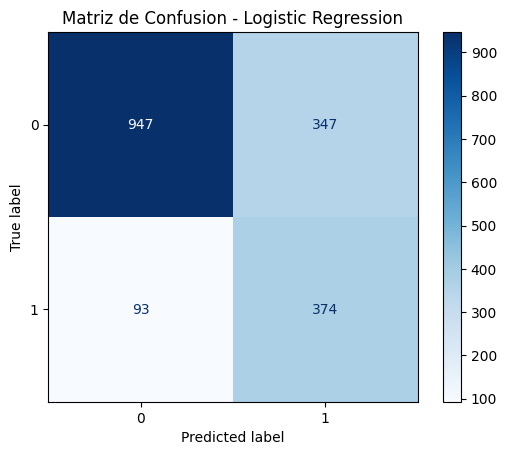

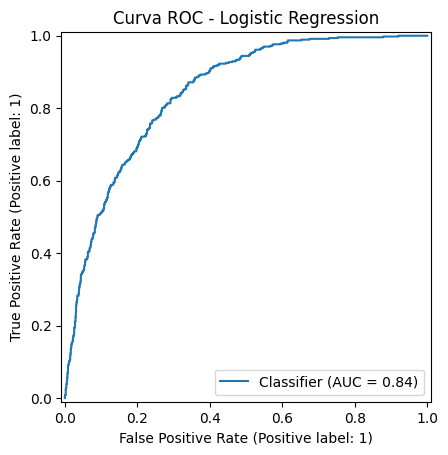


 Random Forest 


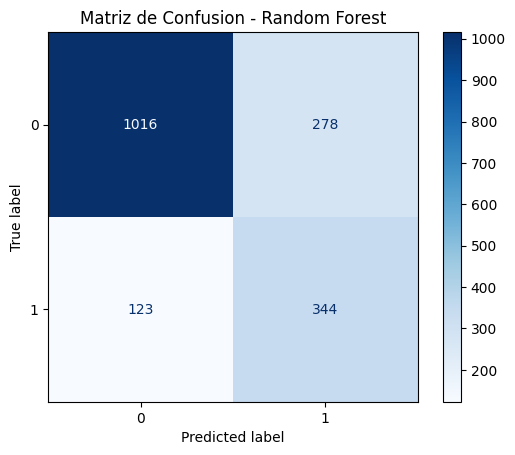

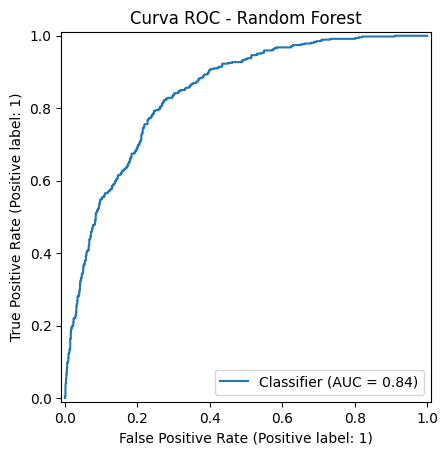


 SVM 


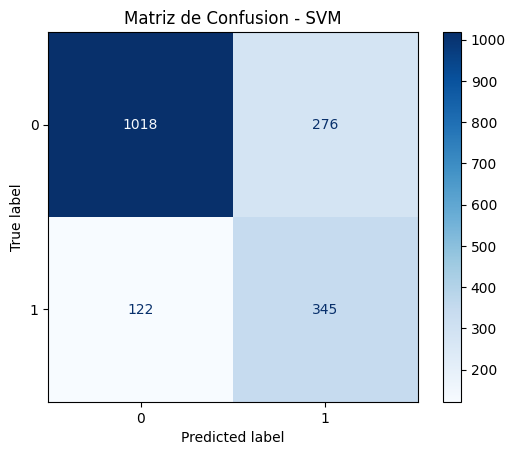


 KNN 


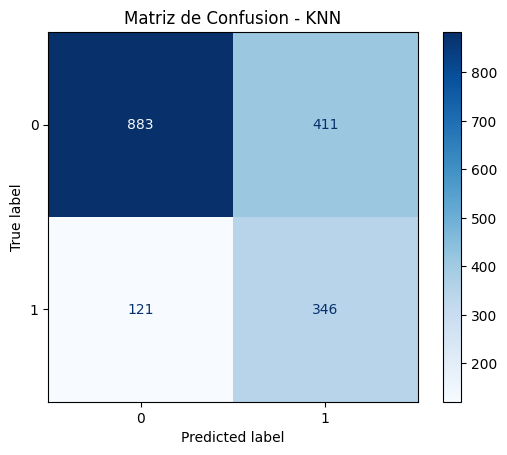

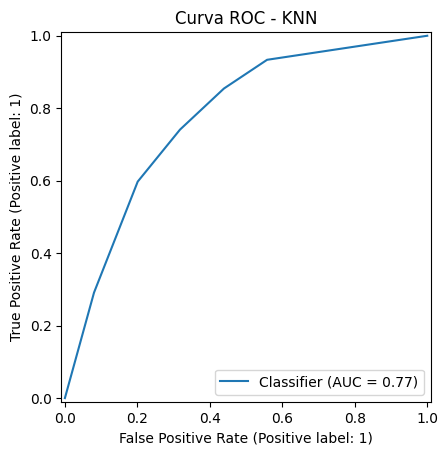

In [ ]:
for name, model in models_fitted.items(): #Recorremos todos los modelos almacenados en models_fitted
    print(f"\n {name} ")

#Calculamos la matriz de confusión comparando y_test y las predicciones del modelo
    cm = confusion_matrix(y_test, model.predict(x_test))
    ConfusionMatrixDisplay(cm).plot(cmap='Blues') #Generamos el gráfico
    plt.title(f"Matriz de Confusion - {name}")
    plt.show()

    #ROC
    if hasattr(model, "predict_proba"): #Primero verificamos si el modelo tiene el metodo predict_proba ya a veces SVM no cuenta con este dato
        y_proba= model.predict_proba(x_test)[:,1] #obtenemos las probabilidades de pertenecer a la clase 1
        RocCurveDisplay.from_predictions(y_test, y_proba) #generamos la curva ROC
        plt.title(f"Curva ROC - {name}")
        plt.show()

#Interpretación del modelo

A partir de las variables del modelo, se realizo un analisis de cada una de ellas, indicando su funcion e importancia

En primer lugar, tenemos la variable "ternure", la cual describe los meses en la empresa. Esta variable es la mas importante, dado que los clientes que presenten menor ternure tiene una probabilidad de churn mucho mas alta. De esto el modelo aprende que los clientes recientes son significativamente mas propensos a abandonar que aquellos con relaciones de largo plazo.

Otra variable es el MonthlyCharges, que  describe los cargos mensuales. Dicha variable igual es muy importante, dado que los clientes que pagan cargos mensuales mas altos tienen un mayor riesgo de churn, lo cual sugiere que los planes de mayor costo son mas sensibles a la percepcion de valor del servicio.

Tambien tenemos la variable Contract o tipo de contrato. Dentro del modelo es importante identificar el tipo de contrato, si es Month-to-month, One year, Two year, donde por ejemplo, el contrato mensual concentra la mayoria de los abandonos, mientras que los contratos de uno o dos años actuan como mecanismos de retencion.

Cerrando las variables mas importantes, tenemos la variable TotalCharge, la cual es basicamente los cargos totales acumulados. Cumple una funcion bastante relevante en el modelo dado que muchos clientes que churnean muestran TotalCharges relativamente bajos, lo cual indica que tienen contratos recientes con mensualidades altas

Finalizando el analisis de las variables del modelo, tenemos variables de menor importancia, que actuan como servicios adicionales, como por ejemplo, InternetService, Online Security, TechSupport, etc. Dichas variables contribuyen a diferenciar perfiles, pero poseen un peso menor que las variables de permanencia y cobro (mencionadas anteriormente).







A partir de la explicacion de la importancia de cada variable se pueden explicar algunos fenomenos del modelo:

-Los clientes nuevos que poseen contratos mensuales y cargos mensuales muy altos conforman el segmento de mayor riesgo de churn.

-La permanencia prolongada y los contratos a largo plazo actuan como factores de proteccion, lo cual influye directamente en la disminucion de la probabilidad de un potencial abandono.

-Los planes de menor costo muestran menor churn, lo cual sugiere una sensibilidad importante al precio.

A partir de la explicacion de la importancia de cada variable se pueden explicar algunos fenomenos del modelo:

-Los clientes nuevos que poseen contratos mensuales y cargos mensuales muy altos conforman el segmento de mayor riesgo de churn.

-La permanencia prolongada y los contratos a largo plazo actuan como factores de proteccion, lo cual influye directamente en la disminucion de la probabilidad de un potencial abandono.

-Los planes de menor costo muestran menor churn, lo cual sugiere una sensibilidad importante al precio.



   




#Conclusiones y recomendaciones

Recomendaciones para áreas comerciales y retención de clientes:

-Programa de retención temprana:



1.   Priorizar clientes con ternure bajo, contrato a corto plazo y MonthyCharges altos
2.   Implementar campañas proactivas durante los primeros meses desde que el servicio es contratado, dado que esos meses presentan el riesgo mas alto de abandono

-Incentivos a contratos de largo plazo:



1.   Diseñar promociones que fomenten la contratacion de contratos a largo plazo, ofreciendo descuentos por permanencia y beneficios adicionales
2.   Enfocar dichos incentivos a los clientes con mayor probabilidad de un churn alto con el fin de evitar el abandono

-Revision de planes y precios:



1.   Ofrecer planes mas economicos a los clientes con alto riesgo de abandono que tienen un cargo mensual elevado
2.   Ofrecer descuentos temporales para mejorar la percepcion del valor

-Uso operativo del modelo de churn:



1.   Genrar dentro del modelo un "scoring mensual", el cual indique en un ranking la probabilidad de churn de cada cliente, y que esa informacion pueda ser manejada por los equipos comerciales
2.   Definir umbrales de accion, con el fin de sistematizar y realizar un contacto automatico a los clientes que tienen un mayor riesgo de abandono

-Monitoreo y mejora continua:



1.   Realizar actualizaciones de forma periodica al modelo a partir del comportamiento de los clientes
2.   Explorar futuras técnicas de interpretabilidad como SHAP, para poder entender de manera individual los factores de riesgo de cada cliente, y poder personalizar la atencion acorde a sus necesidades.








